In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import train as train
import generate
import eval
from modules.config import read_config
import modules.plots as plots
from modules.datageneration import load_data, data_functions
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
BASE_DIR = "../experiments/over-underfit-test/model-64"
PROFILE = "pol-1x64-s002"

In [4]:
configs = read_config(f"{BASE_DIR}/config.ini")
dataset_configs = read_config(f"{BASE_DIR}/dataset_config.ini")

config = configs[PROFILE]
NAME = config["NAME"]
dataset_config = dataset_configs[config["DATASET"]]
DATASET_NAME = dataset_config["NAME"]

dataset_config["train_size"] = "1000000"
dataset_config["test_size"] = "1000000"

====== Generating profile pol-10x-10k-s02 ======
Train: (-2, 2)
Y-space: -4.699266983725555 - 4.293164884803011
In Domain: (-2, 2)
Y-space: -4.5327372681326805 - 4.296943620265988
Out Domain: (-4, 4)
Y-space: -8.476878614941375 - 9.989332856766174


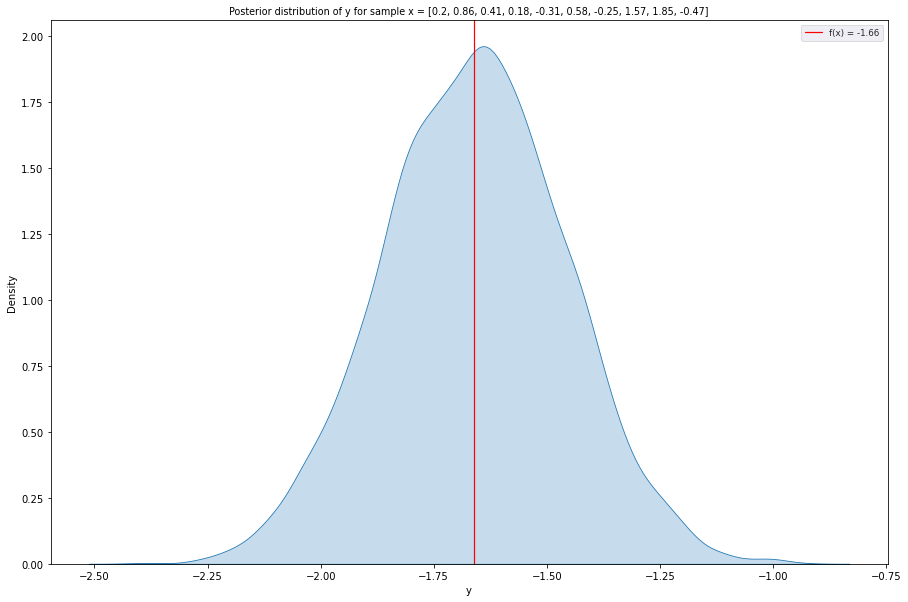

In [5]:
if True:
    if not os.path.exists(f"{BASE_DIR}/datasets"):
                os.mkdir(f"{BASE_DIR}/datasets")
    generate.gen(dataset_config, f"{BASE_DIR}/datasets")

In [6]:
(x_train, y_train), (x_val, y_val), (x_test_in_domain, y_test_in_domain), (x_test_out_domain, y_test_out_domain) = load_data(f"{BASE_DIR}/datasets/{DATASET_NAME}")

In [7]:
x_train[0], y_train[0]

(tensor([ 0.1953,  0.8608,  0.4111,  0.1795, -0.3054,  0.5836, -0.2497,  1.5671,
          1.8547, -0.4662]),
 tensor([-1.5432]))

In [8]:
if x_train[0].shape[0] == 1:
    fig, ax = plt.subplots(2, 1, figsize=(15, 20))
    sns.set(rc = {'figure.figsize':(20,10)})
    sns.scatterplot(x=x_train.flatten(), y=y_train, s=8, ax=ax[0])
    ax[0].set_title("Train data")

    sns.scatterplot(x=x_test_in_domain.flatten(), y=y_test_in_domain, s=8, ax=ax[1], label="In domain")
    sns.scatterplot(x=x_test_out_domain.flatten(), y=y_test_out_domain, s=8, ax=ax[1], label="Out domain")
    ax[1].set_title("Test data")
    ax[1].legend()




In [9]:
#Min y and max y of the train data
y_min = y_train.min()
y_max = y_train.max()
print(f"y_min: {y_min}, y_max: {y_max}")

y_min: -4.6992669105529785, y_max: 4.2931647300720215


In [10]:
#Min y and max y of the out of domain data
y_min = y_test_out_domain.min()
y_max = y_test_out_domain.max()
print(f"y_min: {y_min}, y_max: {y_max}")

y_min: -8.47687816619873, y_max: 9.989333152770996
